In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib as plib
import sys


In [2]:
sys.path.append(".")
sys.path.append("../resources/results")

In [20]:
path = "../resources/results/"
s = "q3_test.csv"

df_raw = pd.read_csv(path + s)

In [23]:
partitions = np.array(df.columns[1:])
df = df_raw.copy()
df[partitions] = df_raw[partitions]/1000

In [24]:
df

,num_cores,2,4,8
0,3,33.186766,30.711136,28.893447
1,4,31.242809,33.415182,29.708291


In [25]:
df["num_cores"].astype('string') + " cores"

0    3 cores
1    4 cores
Name: num_cores, dtype: string

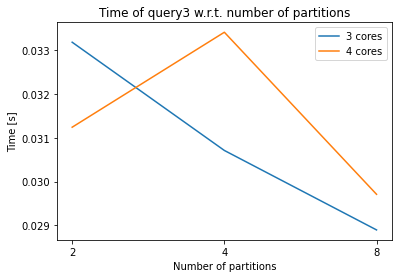

In [31]:
_, ax1 = plt.subplots()
for i in df["num_cores"]:
    plt.plot(partitions, (df[df["num_cores"]==i][partitions]/1000).to_numpy().reshape((3)))
    
plt.title('Time of query3 w.r.t. number of partitions')
plt.ylabel('Time [s]')
plt.xlabel('Number of partitions');  
# plt.gca().set_ylim(bottom=0)
ax1.legend((df["num_cores"].astype('string') + " cores").values);

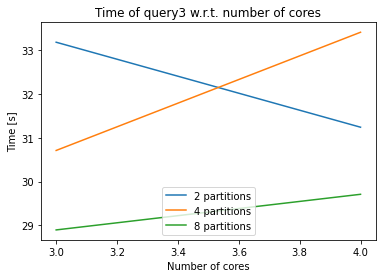

In [30]:
_, ax1 = plt.subplots()
for p in partitions:
    plt.plot(df["num_cores"], df[p])
    
plt.title('Time of query3 w.r.t. number of cores')
plt.ylabel('Time [s]')
plt.xlabel('Number of cores');
# plt.gca().set_ylim(bottom=0)
ax1.legend(df.columns[1:] + " partitions");